In [7]:
from little_help import load_csv, prepare_histograms, plot_string_column
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
print("Wczytanie danych ...")
data = load_csv('income_evaluation.csv')

Wczytanie danych ...


In [9]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


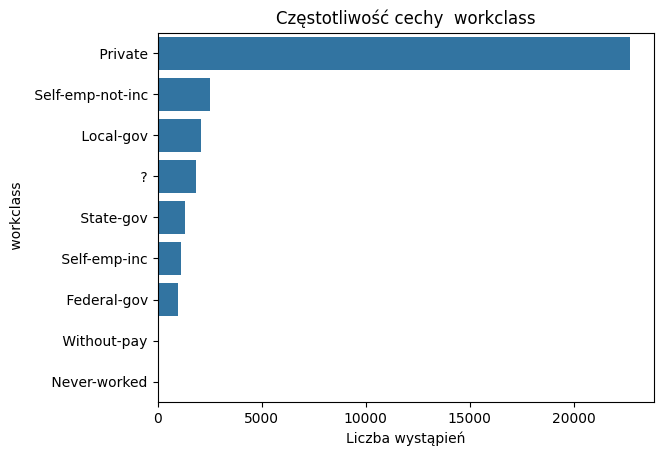

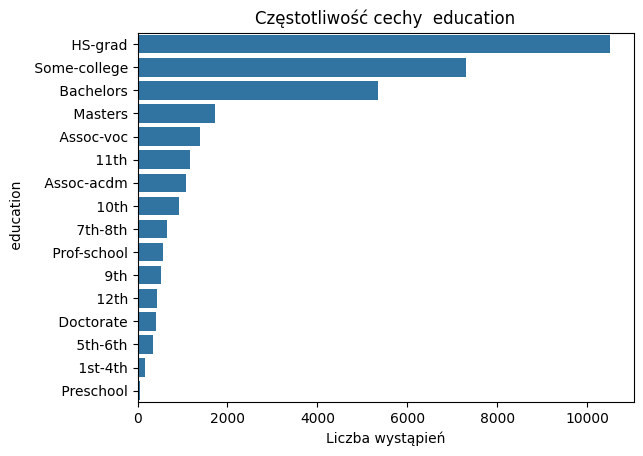

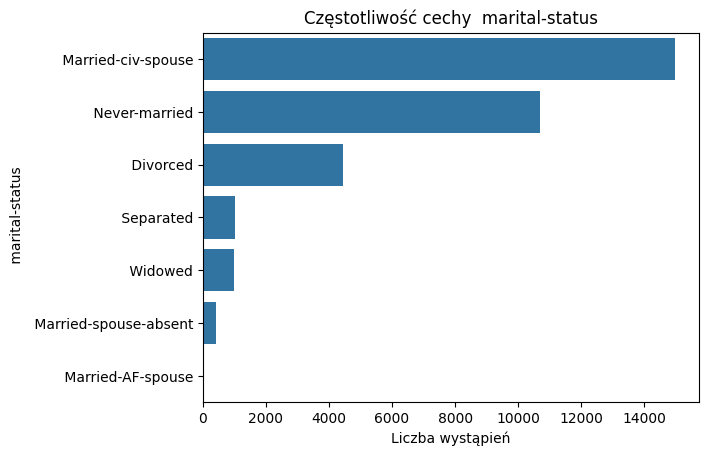

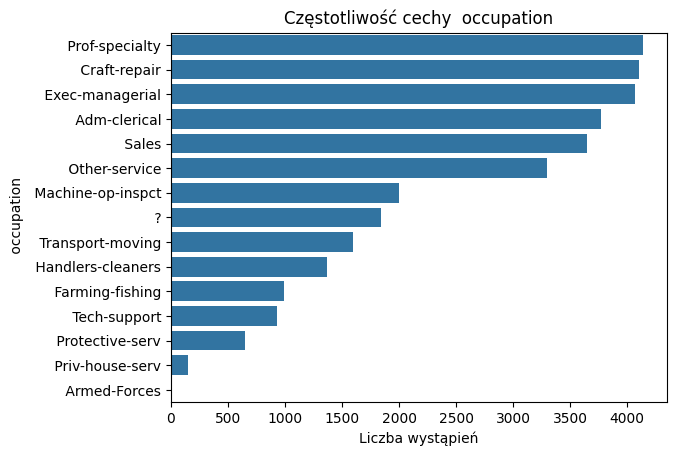

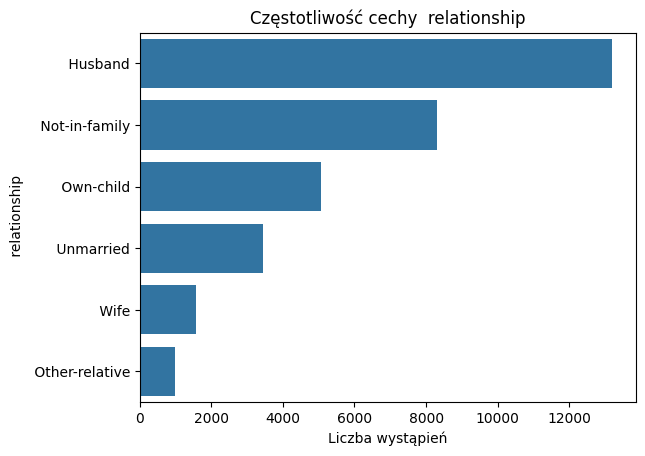

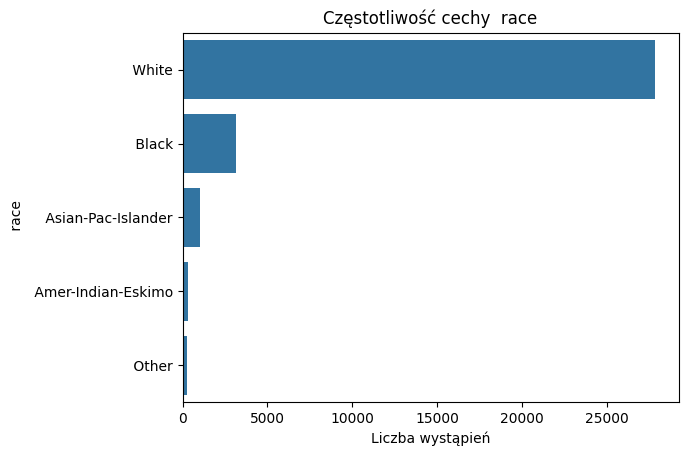

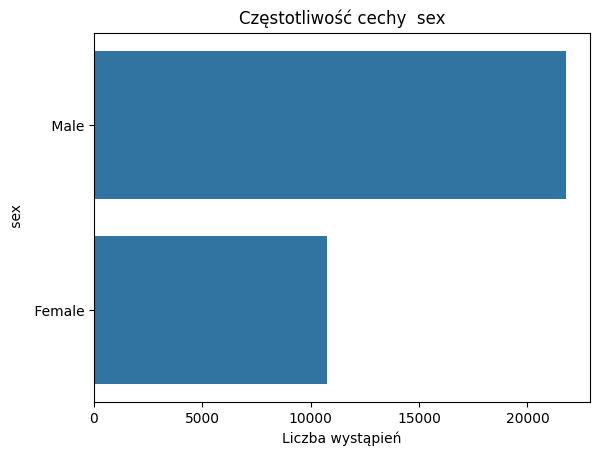

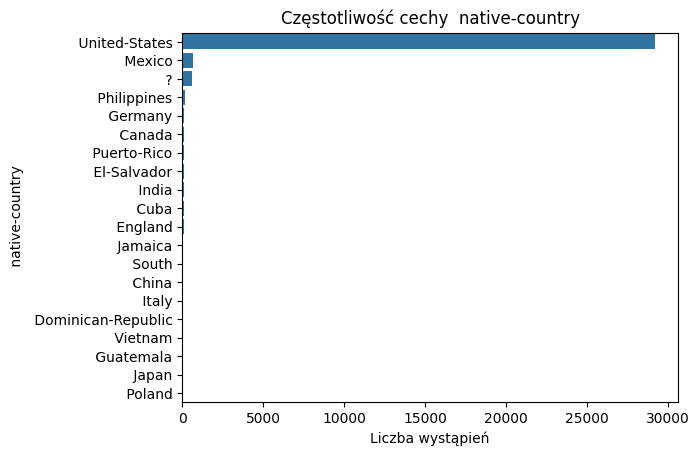

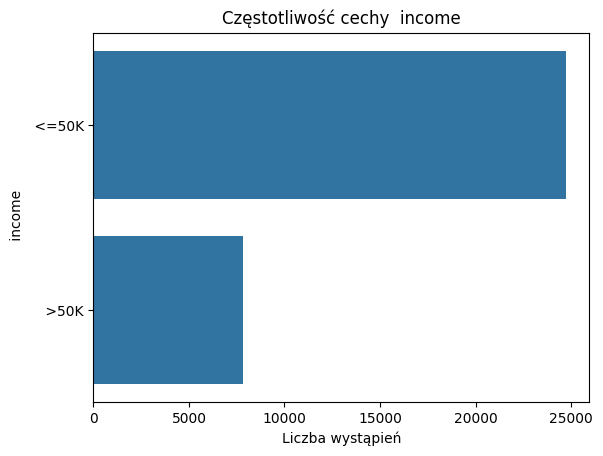

In [10]:
plot_string_column(data,'Top')

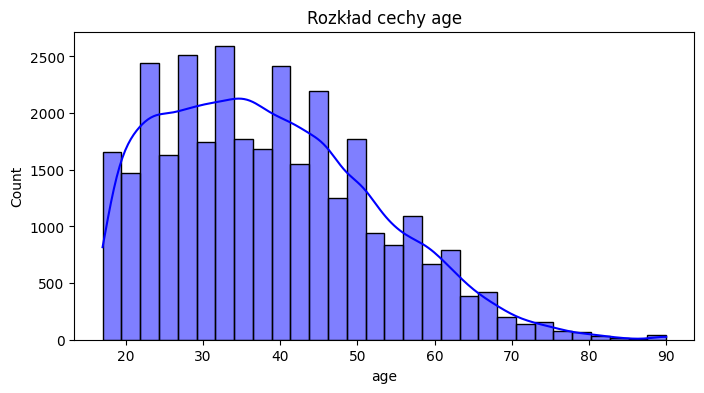

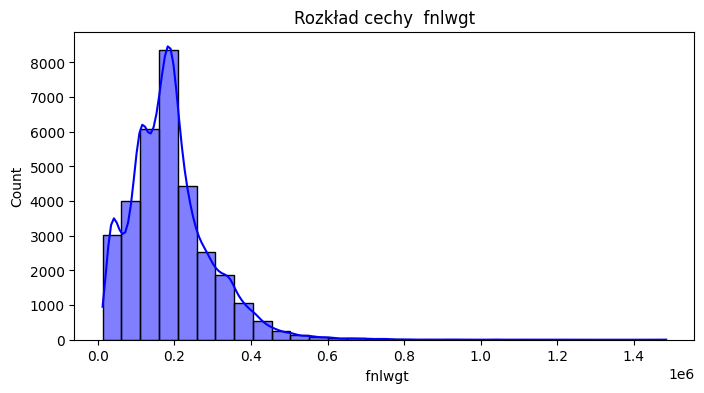

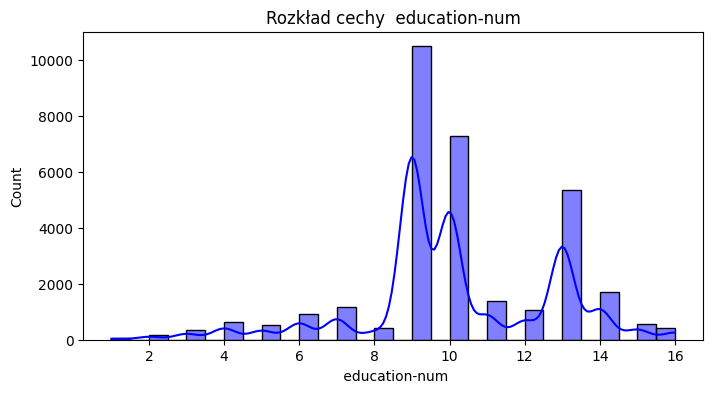

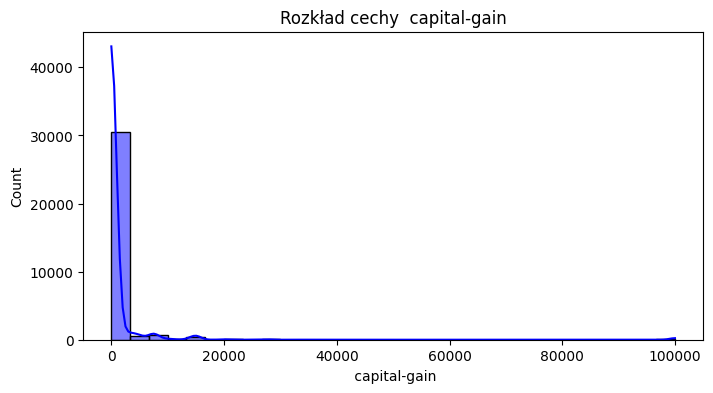

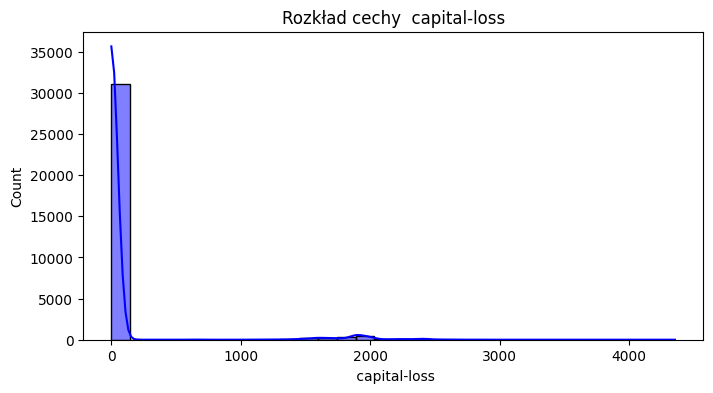

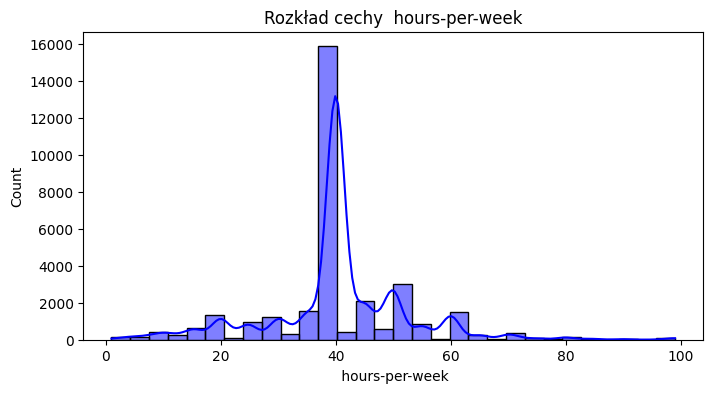

In [11]:
prepare_histograms(data)

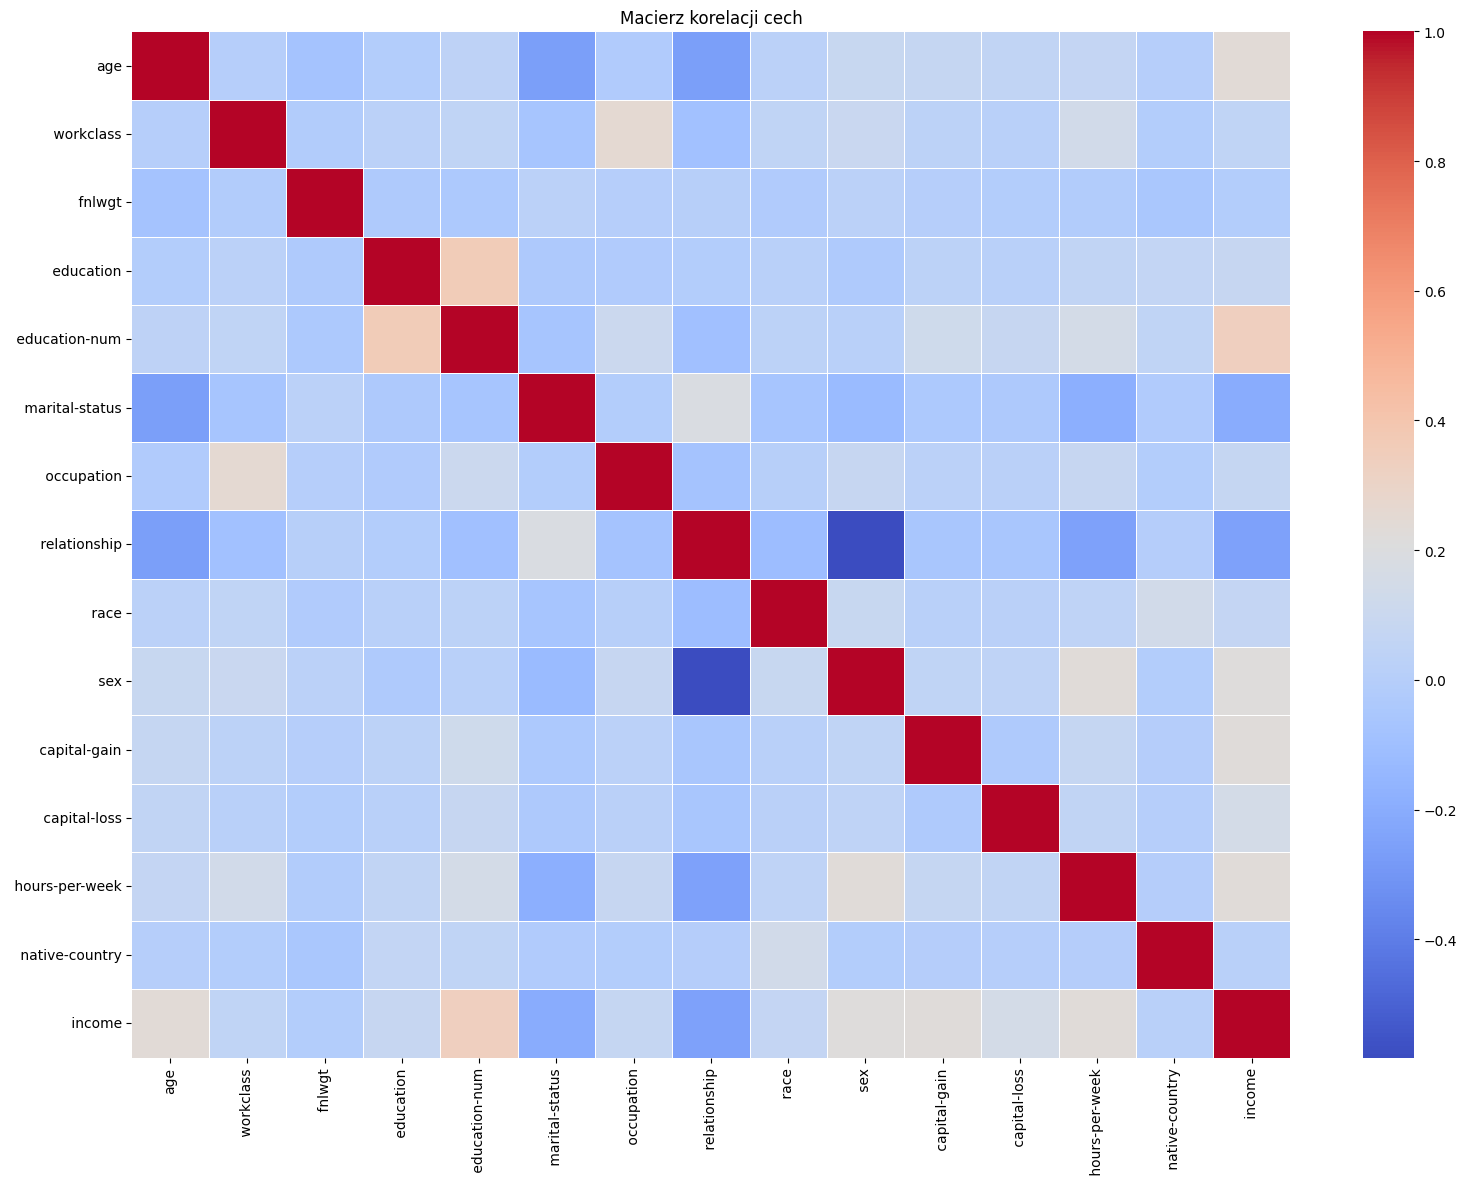

In [12]:
df_encoded = data.copy()
label_encoders = {}

for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Oblicz macierz korelacji
correlation_matrix = df_encoded.corr()

# Rysuj heatmapę
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji cech")
plt.tight_layout()
plt.show()

In [13]:
encoder = OrdinalEncoder()

# Dopasowujemy encoder do danych i transformujemy
encoded_data = encoder.fit_transform(data)

# Teraz standaryzacja
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(encoded_data)

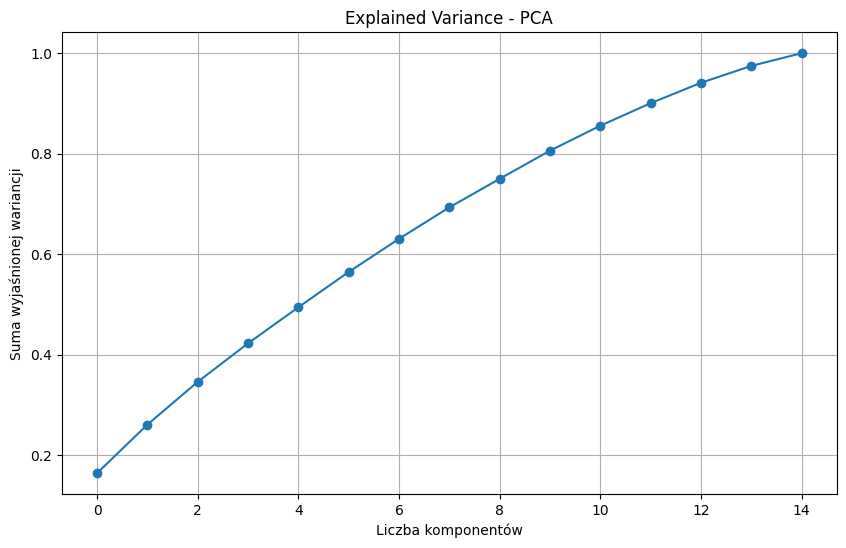

In [14]:
pca_full = PCA()
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Liczba komponentów')
plt.ylabel('Suma wyjaśnionej wariancji')
plt.title('Explained Variance - PCA')
plt.grid(True)
plt.show()

In [15]:

pca = PCA(n_components=10)  # albo np. więcej komponentów
pca_result = pca.fit_transform(df_scaled)

print("Wyjaśniona wariancja:", pca.explained_variance_ratio_)

Wyjaśniona wariancja: [0.16366374 0.09669355 0.08517454 0.07670186 0.07180549 0.07030787
 0.06597817 0.06264378 0.05686365 0.05606168]


In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result)

print("PCA rozkład klastrów:")
print(np.bincount(clusters))

PCA rozkład klastrów:
[15088 17473]


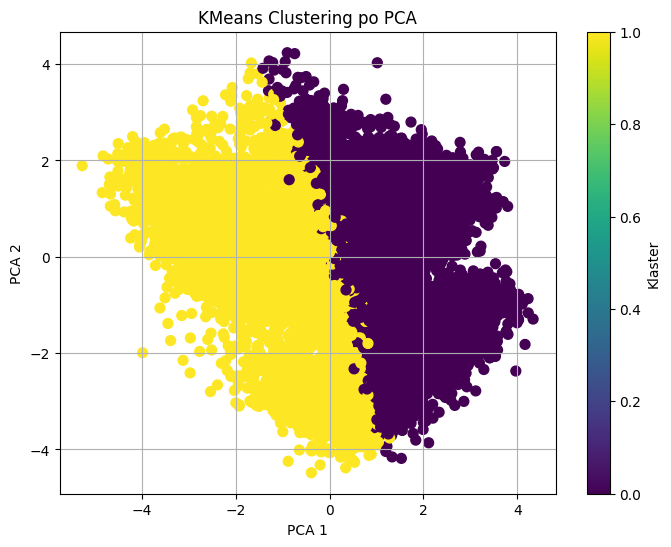

In [17]:
import matplotlib.pyplot as plt

# Zakładamy, że pca_result ma dwa wymiary: [X, Y]
plt.figure(figsize=(8, 6))

# Tworzymy scatter plot: każdy punkt ma kolor zależny od klastra
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)

plt.title('KMeans Clustering po PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Klaster')
plt.grid(True)
plt.show()

